<a href="https://colab.research.google.com/github/prudvinathmalepati/machine-learning/blob/main/group_project/stackoverflow_tag_predection_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
#Connecting to Google Drive and importing the dataset.
from google.colab import drive

drive.mount('/content/gdrive', force_remount=True)

df_path = 'gdrive/My Drive/Questions.csv'
dataset = pd.read_csv(df_path, encoding="ISO-8859-1")

Mounted at /content/gdrive


In [3]:
dataset.shape

(1264216, 7)

In [4]:
dataset.head()

,Id,OwnerUserId,CreationDate,ClosedDate,Score,Title,Body
0,80,26.0,2008-08-01T13:57:07Z,NaN,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...
1,90,58.0,2008-08-01T14:41:24Z,2012-12-26T03:45:49Z,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...
2,120,83.0,2008-08-01T15:50:08Z,NaN,21,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...
3,180,2089740.0,2008-08-01T18:42:19Z,NaN,53,Function for creating color wheels,<p>This is something I've pseudo-solved many t...
4,260,91.0,2008-08-01T23:22:08Z,NaN,49,Adding scripting functionality to .NET applica...,<p>I have a little game written in C#. It uses...


In [5]:
tags_path = 'gdrive/My Drive/Tags.csv'
tags = pd.read_csv(tags_path, encoding="ISO-8859-1", dtype={'Tag': str})

In [6]:
tags.head(5)

,Id,Tag
0,80,flex
1,80,actionscript-3
2,80,air
3,90,svn
4,90,tortoisesvn


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1264216 entries, 0 to 1264215
Data columns (total 7 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   Id            1264216 non-null  int64  
 1   OwnerUserId   1249762 non-null  float64
 2   CreationDate  1264216 non-null  object 
 3   ClosedDate    55959 non-null    object 
 4   Score         1264216 non-null  int64  
 5   Title         1264216 non-null  object 
 6   Body          1264216 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 67.5+ MB


In [8]:
tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3750994 entries, 0 to 3750993
Data columns (total 2 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   Id      int64 
 1   Tag     object
dtypes: int64(1), object(1)
memory usage: 57.2+ MB


First, what I want to do is to merge both dataframes. In order to do that, I'll have to group tags by the id of the post since a post can have multiple tags. I'll just use the groupeby function and then merge the dataframes on the id.

In [9]:
tags['Tag'] = tags['Tag'].astype(str)

In [10]:
grouped_tags = tags.groupby("Id")['Tag'].apply(lambda tags: ' '.join(tags))

In [11]:
grouped_tags.head(5)

Id
80                            flex actionscript-3 air
90       svn tortoisesvn branch branching-and-merging
120                               sql asp.net sitemap
180    algorithm language-agnostic colors color-space
260           c# .net scripting compiler-construction
Name: Tag, dtype: object

In [12]:
grouped_tags.reset_index()

,Id,Tag
0,80,flex actionscript-3 air
1,90,svn tortoisesvn branch branching-and-merging
2,120,sql asp.net sitemap
3,180,algorithm language-agnostic colors color-space
4,260,c# .net scripting compiler-construction
...,...,...
1264211,40143210,php .htaccess
1264212,40143300,google-bigquery
1264213,40143340,android android-studio
1264214,40143360,javascript vue.js


In [13]:
grouped_tags_final = pd.DataFrame({'Id':grouped_tags.index, 'Tags':grouped_tags.values})

In [14]:
grouped_tags_final.head(5)

,Id,Tags
0,80,flex actionscript-3 air
1,90,svn tortoisesvn branch branching-and-merging
2,120,sql asp.net sitemap
3,180,algorithm language-agnostic colors color-space
4,260,c# .net scripting compiler-construction


#Data preprocessing

> Drop OwnerUserId, CreationDate, ClosedDate columns from the questions dataset

In [15]:
dataset.drop(columns=['OwnerUserId', 'CreationDate', 'ClosedDate'], inplace=True)

> Now we'll merge questions and tags using Id

In [16]:
dataset = dataset.merge(grouped_tags_final, on='Id')

In [17]:
#check the final dataset
dataset.head()

,Id,Score,Title,Body,Tags
0,80,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...,flex actionscript-3 air
1,90,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...,svn tortoisesvn branch branching-and-merging
2,120,21,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...,sql asp.net sitemap
3,180,53,Function for creating color wheels,<p>This is something I've pseudo-solved many t...,algorithm language-agnostic colors color-space
4,260,49,Adding scripting functionality to .NET applica...,<p>I have a little game written in C#. It uses...,c# .net scripting compiler-construction


Now, I'll take only quesions witha score greater than 10. I'm doing that for 2 reasons:

1.  I'll require less computational resources from colab.
2.  The posts will probably be with a better quality and will be better tagged since they have lots of upvotes.

In [18]:
dataset[dataset.Score > 10].count()

Id       32604
Score    32604
Title    32604
Body     32604
Tags     32604
dtype: int64

In [19]:
final_dataset = dataset[dataset.Score > 10]

In [20]:
final_dataset.shape

(32604, 5)

In [21]:
final_dataset.head()

,Id,Score,Title,Body,Tags
0,80,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...,flex actionscript-3 air
1,90,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...,svn tortoisesvn branch branching-and-merging
2,120,21,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...,sql asp.net sitemap
3,180,53,Function for creating color wheels,<p>This is something I've pseudo-solved many t...,algorithm language-agnostic colors color-space
4,260,49,Adding scripting functionality to .NET applica...,<p>I have a little game written in C#. It uses...,c# .net scripting compiler-construction


###Cleaning Data

In [22]:
import matplotlib.pyplot as plt

##### Missing row and duplicate rows

Text(0.5, 1.0, 'Ratio of missing values per columns')

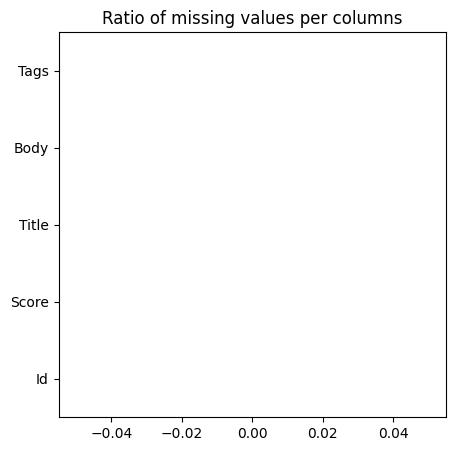

In [23]:
plt.figure(figsize=(5, 5))
final_dataset.isnull().mean(axis=0).plot.barh()
plt.title("Ratio of missing values per columns")

In [24]:
print('Dupplicate entries: {}'.format(final_dataset.duplicated().sum()))
final_dataset.drop_duplicates(inplace = True)

Dupplicate entries: 0


<ipython-input-24-8a863405cc5a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_dataset.drop_duplicates(inplace = True)


This is a very good dataset since there are no missing valeus or dupplicate values.

In [25]:
final_dataset['Tags'].nunique()

25759

In [26]:
final_dataset['Tags'] = final_dataset['Tags'].apply(lambda x: x.split())

<ipython-input-26-c8001d9271ed>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_dataset['Tags'] = final_dataset['Tags'].apply(lambda x: x.split())


In [27]:
all_tags = [item for sublist in final_dataset['Tags'].values for item in sublist]

In [28]:
len(all_tags)

99335

In [29]:
#Getting unique tags in out dataset (selected)
my_set = set(all_tags)
unique_tags = list(my_set)
len(unique_tags)

9766

In [30]:
import nltk

In [31]:
#Let's get top 100 features
flat_list = [item for sublist in final_dataset['Tags'].values for item in sublist]

keywords = nltk.FreqDist(flat_list)

keywords = nltk.FreqDist(keywords)

frequencies_words = keywords.most_common(100)
tags_features = [word[0] for word in frequencies_words]

In [32]:
tags_features

['java',
 'c#',
 'javascript',
 'android',
 'python',
 'c++',
 '.net',
 'php',
 'jquery',
 'ios',
 'html',
 'css',
 'iphone',
 'c',
 'objective-c',
 'ruby-on-rails',
 'ruby',
 'sql',
 'git',
 'mysql',
 'asp.net',
 'linux',
 'asp.net-mvc',
 'string',
 'r',
 'angularjs',
 'node.js',
 'performance',
 'eclipse',
 'sql-server',
 'xcode',
 'django',
 'arrays',
 'algorithm',
 'wpf',
 'windows',
 'haskell',
 'c++11',
 'visual-studio',
 'json',
 'scala',
 'bash',
 'regex',
 'multithreading',
 'swift',
 'database',
 'osx',
 'unit-testing',
 'html5',
 'xml',
 'spring',
 'cocoa-touch',
 'ruby-on-rails-3',
 'debugging',
 'ajax',
 'twitter-bootstrap',
 'vim',
 'visual-studio-2010',
 'entity-framework',
 'linq',
 'shell',
 'mongodb',
 'postgresql',
 'list',
 'winforms',
 'generics',
 'oop',
 'svn',
 'cocoa',
 'css3',
 'google-chrome',
 'github',
 'http',
 'gcc',
 'asp.net-mvc-3',
 'maven',
 'perl',
 'math',
 'tsql',
 'oracle',
 'exception',
 'security',
 'rest',
 'templates',
 'image',
 'datetime',
 

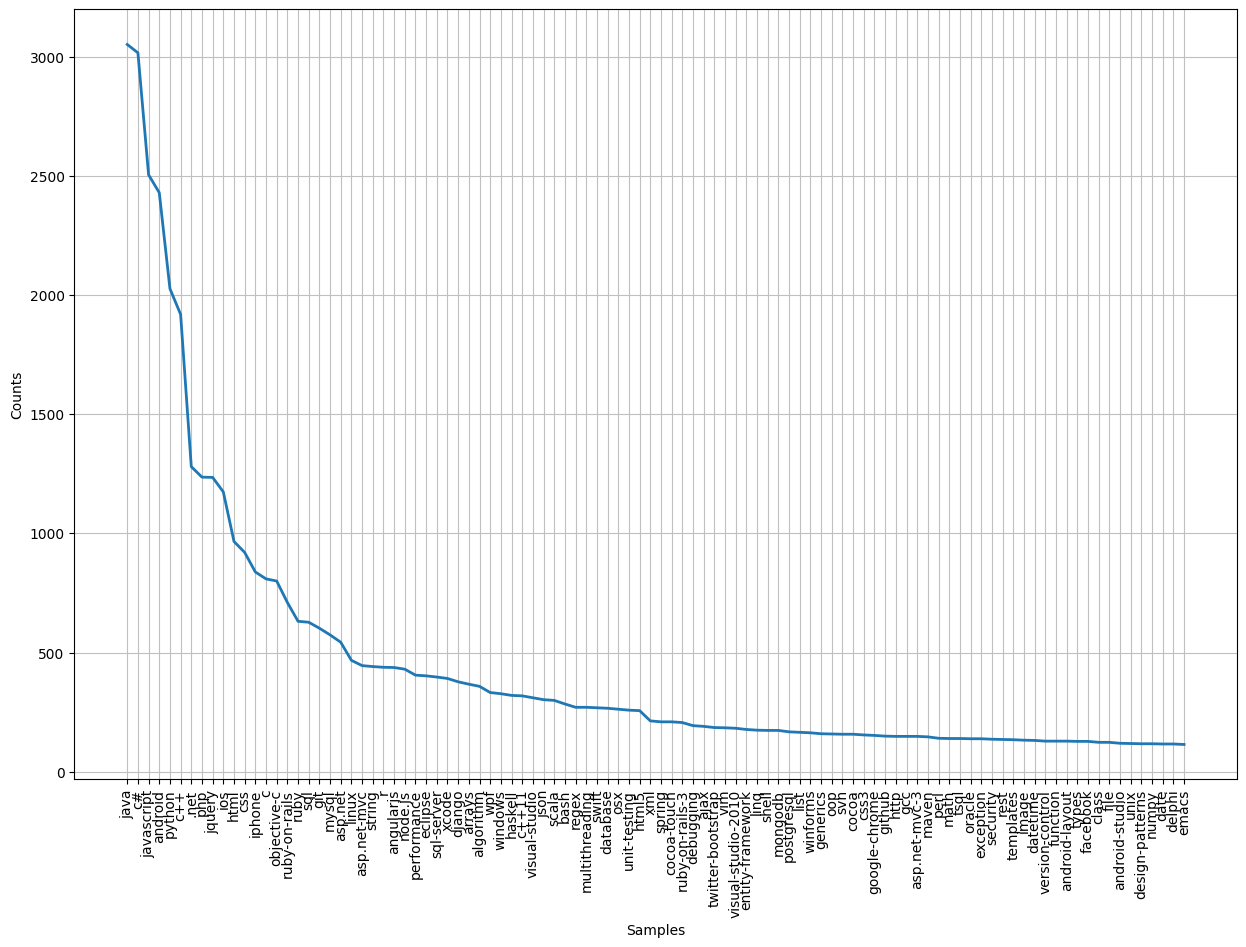

<Axes: xlabel='Samples', ylabel='Counts'>

In [33]:
fig, ax = plt.subplots(figsize=(15, 10))
keywords.plot(100, cumulative=False)

In [34]:
final_dataset.head()

,Id,Score,Title,Body,Tags
0,80,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...,"[flex, actionscript-3, air]"
1,90,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...,"[svn, tortoisesvn, branch, branching-and-merging]"
2,120,21,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...,"[sql, asp.net, sitemap]"
3,180,53,Function for creating color wheels,<p>This is something I've pseudo-solved many t...,"[algorithm, language-agnostic, colors, color-s..."
4,260,49,Adding scripting functionality to .NET applica...,<p>I have a little game written in C#. It uses...,"[c#, .net, scripting, compiler-construction]"


In [35]:
java_data = final_dataset[final_dataset.Tags.astype(str).str.contains(('java'))]

In [36]:
java_data.head()

,Id,Score,Title,Body,Tags
45,4080,92,What code analysis tools do you use for your J...,<p>What code analysis tools do you use on your...,"[java, code-coverage, static-analysis]"
80,7720,33,Packaging Java apps for the Windows/Linux desktop,<p>I am writing an application in Java for the...,"[java, windows, swt, executable, software-dist..."
161,15390,26,Best practices for managing and deploying larg...,<p>What are some standard practices for managi...,"[javascript, web-applications, deployment]"
169,16140,38,What's the best way to get started with OSGI?,<p>What makes a module/service/bit of applicat...,"[java, spring, osgi]"
205,19280,16,Code to ask yes/no question in javascript,<p>I could only find the function <code>confir...,[javascript]


In [38]:
java_data.shape

(5649, 5)

<Axes: >

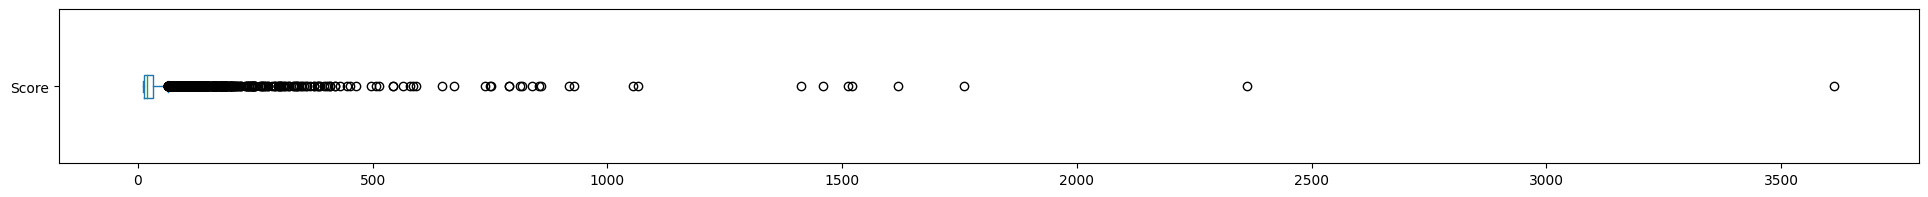

In [39]:
java_data[['Score']].plot(kind='box', vert=False, figsize=(24,2))

In [40]:
java_data.describe()

,Id,Score
count,5.649000e+03,5649.000000
mean,1.045672e+07,39.804036
std,9.219124e+06,99.975998
min,4.080000e+03,11.000000
25%,3.128120e+06,13.000000
50%,7.737850e+06,19.000000
75%,1.548138e+07,33.000000
max,3.990046e+07,3613.000000


In [41]:
c_data = final_dataset[final_dataset.Tags.astype(str).str.contains(('c#'))]

<Axes: >

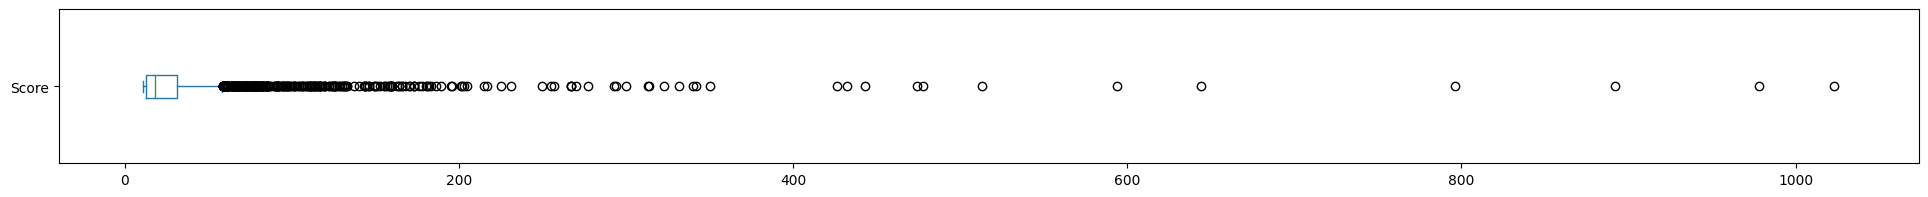

In [42]:
c_data[['Score']].plot(kind='box', vert=False, figsize=(24,2))

In [43]:
pd.set_option('display.max_colwidth', None)
print(java_data[java_data.Score > 3000].Body.to_string(index=False))

<p>I always thought Java was <strong>pass-by-reference</strong>; however I've seen a couple of blog posts (for example, <a href="http://javadude.com/articles/passbyvalue.htm">this blog</a>) that claim it's not. I don't think I understand the distinction they're making. </p>\n\n<p>What is the explanation?</p>\n


In [44]:
print(c_data[c_data.Score > 1000].Body.to_string(index=False))

<p>I know from reading <a href="http://msdn.microsoft.com/en-us/library/system.idisposable.aspx">the MSDN documentation</a> that the "primary" use of the IDisposable interface is to clean up unmanaged resources.</p>\n\n<p>To me, "unmanaged" means things like database connections, sockets, window handles, etc.  But, I've seen code where the Dispose method is implemented to free <em>managed</em> resources, which seems redundant to me, since the garbage collector should take care of that for you.</p>\n\n<p>For example:</p>\n\n<pre><code>public class MyCollection : IDisposable\n{\n    private List&lt;String&gt; _theList = new List&lt;String&gt;();\n    private Dictionary&lt;String, Point&gt; _theDict = new Dictionary&lt;String, Point&gt;();\n\n    // Die, clear it up! (free unmanaged resources)\n    public void Dispose()\n    {\n        _theList.clear();\n        _theDict.clear();\n        _theList = null;\n        _theDict = null;\n    }\n</code></pre>\n\n<p>My question is, does this make

###Data cleaning

In the next two columns: Body and Title, I'll use lots of text processing:

* Removing html format 
* Lowering text 
* Transforming abbreviations
* Removing punctuation (but keeping words like c# since it's the most popular tag) 
* Lemmatizing words 
* Removing stop words




> First we'l clean Body

In [45]:
import warnings

import re
from bs4 import BeautifulSoup
import nltk
from nltk.tokenize import ToktokTokenizer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
from string import punctuation

In [ ]:
final_dataset['Body_clean'] = final_dataset['Body'].apply(lambda x: BeautifulSoup(x).get_text()) 

In [47]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", "is", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "can not ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"'m", "am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    text = re.sub(r"\'\n", " ", text)
    text = re.sub(r"\'\xa0", " ", text)
    text = re.sub('\s+', ' ', text)
    text = re.sub(r"won\'t", "will not", text)
    
    text = text.strip(' ')
    return text

In [ ]:
final_dataset['Body_clean'] = final_dataset['Body_clean'].apply(lambda x: clean_text(x)) 

In [49]:
token=ToktokTokenizer()

In [50]:
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [51]:
punct = '!"#$%&\'()*+,./:;<=>?@[\\]^_`{|}~'

In [52]:
def strip_list_noempty(mylist):
    newlist = (item.strip() if hasattr(item, 'strip') else item for item in mylist)
    return [item for item in newlist if item != '']

In [53]:
def clean_punct(text): 
    words=token.tokenize(text)
    punctuation_filtered = []
    regex = re.compile('[%s]' % re.escape(punct))
    remove_punctuation = str.maketrans(' ', ' ', punct)
    for w in words:
        if w in tags_features:
            punctuation_filtered.append(w)
        else:
            punctuation_filtered.append(regex.sub('', w))
  
    filtered_list = strip_list_noempty(punctuation_filtered)
        
    return ' '.join(map(str, filtered_list))

In [54]:
final_dataset['Body_clean'] = final_dataset['Body_clean'].apply(lambda x: clean_punct(x)) 

<ipython-input-54-d231245d3184>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_dataset['Body_clean'] = final_dataset['Body_clean'].apply(lambda x: clean_punct(x))


In [55]:
final_dataset['Body_clean'][2]

'has anyone got experience creating sql-based asp.net site-map providers i have got the default xml file websitemap working properly with my menu and sitemappath controls but i will need a way for the users of my site to create and modify pages dynamically i need to tie page viewing permissions into the standard asp.net membership system as well'

In [ ]:
nltk.download('stopwords')

In [57]:
lemma=WordNetLemmatizer()
stop_words = set(stopwords.words("english"))

In [58]:
def lemitizeWords(text):
    words=token.tokenize(text)
    listLemma=[]
    for w in words:
        x=lemma.lemmatize(w, pos="v")
        listLemma.append(x)
    return ' '.join(map(str, listLemma))

def stopWordsRemove(text):
    
    stop_words = set(stopwords.words("english"))
    
    words=token.tokenize(text)
    
    filtered = [w for w in words if not w in stop_words]
    
    return ' '.join(map(str, filtered))

In [ ]:
nltk.download('wordnet')

In [ ]:
final_dataset['Body_clean'] = final_dataset['Body_clean'].apply(lambda x: lemitizeWords(x)) 
final_dataset['Body_clean'] = final_dataset['Body_clean'].apply(lambda x: stopWordsRemove(x)) 

> Now, I'll clean the Title

In [ ]:
final_dataset['Title_clean'] = final_dataset['Title'].apply(lambda x: str(x))
final_dataset['Title_clean'] = final_dataset['Title_clean'].apply(lambda x: clean_text(x)) 
final_dataset['Title_clean'] = final_dataset['Title_clean'].apply(lambda x: clean_punct(x)) 
final_dataset['Title_clean'] = final_dataset['Title_clean'].apply(lambda x: lemitizeWords(x)) 
final_dataset['Title_clean'] = final_dataset['Title_clean'].apply(lambda x: stopWordsRemove(x)) 

In [63]:
final_dataset.shape

(32604, 7)

In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [ ]:
for i, row in final_dataset.iterrows():
    if i % 1000 == 0:
        print(i) # This is just to look at how many rows are processed (Useful when working with the complete dataset).
    if(row["Body_clean"] and len(str(row["Body_clean"])) < 100000):
        doc = nlp(str(row["Body_clean"]))
        adjectives = []
        nouns = []
        verbs = []
        lemmas = []

        for token in doc:
            lemmas.append(token.lemma_)
            if token.pos_ == "ADJ":
                adjectives.append(token.lemma_)
            if token.pos_ == "NOUN" or token.pos_ == "PROPN":
                nouns.append(token.lemma_)
            if token.pos_ == "VERB":
                verbs.append(token.lemma_)
                
        final_dataset.at[i, "Body_lemma"] = " ".join(lemmas)                
        final_dataset.at[i, "Body_nouns"] = " ".join(nouns)
        final_dataset.at[i, "Body_adjectives"] = " ".join(adjectives)
        final_dataset.at[i, "Body_verbs"] = " ".join(verbs)
        final_dataset.at[i, "Body_nav"] = " ".join(nouns+adjectives+verbs)
        final_dataset.at[i, "no_tokens"] = len(lemmas)

In [80]:
final_dataset.head()

,Id,Score,Title,Body,Tags,Body_clean,Title_clean,Body_lemma,Body_nouns,Body_adjectives,Body_verbs,Body_nav,no_tokens
0,80,26,SQLStatement.execute() - multiple queries in one statement,"<p>I've written a database generation script in <a href=""http://en.wikipedia.org/wiki/SQL"">SQL</a> and want to execute it in my <a href=""http://en.wikipedia.org/wiki/Adobe_Integrated_Runtime"">Adobe AIR</a> application:</p>\n\n<pre><code>Create Table tRole (\n roleID integer Primary Key\n ,roleName varchar(40)\n);\nCreate Table tFile (\n fileID integer Primary Key\n ,fileName varchar(50)\n ,fileDescription varchar(500)\n ,thumbnailID integer\n ,fileFormatID integer\n ,categoryID integer\n ,isFavorite boolean\n ,dateAdded date\n ,globalAccessCount integer\n ,lastAccessTime date\n ,downloadComplete boolean\n ,isNew boolean\n ,isSpotlight boolean\n ,duration varchar(30)\n);\nCreate Table tCategory (\n categoryID integer Primary Key\n ,categoryName varchar(50)\n ,parent_categoryID integer\n);\n...\n</code></pre>\n\n<p>I execute this in Adobe AIR using the following methods:</p>\n\n<pre><code>public static function RunSqlFromFile(fileName:String):void {\n var file:File = File.applicationDirectory.resolvePath(fileName);\n var stream:FileStream = new FileStream();\n stream.open(file, FileMode.READ)\n var strSql:String = stream.readUTFBytes(stream.bytesAvailable);\n NonQuery(strSql);\n}\n\npublic static function NonQuery(strSQL:String):void\n{\n var sqlConnection:SQLConnection = new SQLConnection();\n sqlConnection.open(File.applicationStorageDirectory.resolvePath(DBPATH);\n var sqlStatement:SQLStatement = new SQLStatement();\n sqlStatement.text = strSQL;\n sqlStatement.sqlConnection = sqlConnection;\n try\n {\n sqlStatement.execute();\n }\n catch (error:SQLError)\n {\n Alert.show(error.toString());\n }\n}\n</code></pre>\n\n<p>No errors are generated, however only <code>tRole</code> exists. It seems that it only looks at the first query (up to the semicolon- if I remove it, the query fails). Is there a way to call multiple queries in one statement?</p>\n","[flex, actionscript-3, air]",write database generation script sql want execute adobe air application create table trole roleid integer primary key rolename varchar 40 create table tfile fileid integer primary key filename varchar 50 filedescription varchar 500 thumbnailid integer fileformatid integer categoryid integer isfavorite boolean dateadded date globalaccesscount integer lastaccesstime date downloadcomplete boolean isnew boolean isspotlight boolean duration varchar 30 create table tcategory categoryid integer primary key categoryname varchar 50 parentcategoryid integer execute adobe air use follow methods public static function runsqlfromfile filename string void var file file fileapplicationdirectoryresolvepath filename var stream filestream new filestream streamopen file filemoderead var strsql string streamreadutfbytes streambytesavailable nonquery strsql public static function nonquery strsql string void var sqlconnection sqlconnection new sqlconnection sqlconnectionopen fileapplicationstoragedirectoryresolvepath dbpath var sqlstatement sqlstatement new sqlstatement sqlstatementtext strsql sqlstatementsqlconnection sqlconnection try sqlstatementexecute catch error sqlerror alertshow errortostring errors generate however trole exist seem look first query semicolon- remove query fail way call multiple query one statement,sqlstatementexecute - multiple query one statement,write database generation script sql want execute adobe air application create table trole roleid integer primary key rolename varchar 40 create table tfile fileid integer primary key filename varchar 50 filedescription varchar 500 thumbnailid integer fileformatid integer categoryid integer isfavorite boolean dateadde date globalaccesscount integer lastaccesstime date downloadcomplete boolean isnew boolean isspotlight boolean duration varchar 30 create table tcategory categoryid integer primary key categoryname varchar 50 

#####EDA

In [81]:
# filter warnings on depreciation etc.
import warnings
warnings.filterwarnings("ignore")

In [82]:
# import pandas, numpy
import pandas as pd
import numpy as np

# adjust pandas display
pd.options.display.max_columns = 30
pd.options.display.max_rows = 100
pd.options.display.float_format = '{:.2f}'.format
pd.options.display.precision = 2
pd.options.display.max_colwidth = -1

In [83]:
# Import matplotlib and seaborn and adjust some defaults
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

from matplotlib import pyplot as plt
plt.rcParams['figure.dpi'] = 100

import seaborn as sns
sns.set_style("whitegrid")

In [84]:
final_dataset.count()

Id                 32604
Score              32604
Title              32604
Body               32604
Tags               32604
Body_clean         32604
Title_clean        32604
Body_lemma         32603
Body_nouns         32603
Body_adjectives    32603
Body_verbs         32603
Body_nav           32603
no_tokens          32603
dtype: int64

###Exploring Word Frequencies

In [85]:
java_df = final_dataset[final_dataset.Tags.astype(str).str.contains(('java'))]

In [86]:
java_df[['Body_clean', 'Body_nouns']].sample(2)
# We notice that not all words in noun column are actually nouns :)

,Body_clean,Body_nouns
45,code analysis tool use java project interest kinds static code analysis tool findbugs pmd others code coverage tool cobertura emma others instrumentation-based tool anything else iam miss something applicable also state build tool use well tool integrate ides build tool tool available specific way ide plugin say build tool plugin information also worth note,code analysis tool project interest code analysis tool findbug other code coverage tool emma other instrumentation tool iam state build tool use well tool ide tool tool way ide plugin tool information
448879,set attribute html label element javascript without use jquery library,attribute html label element javascript use jquery library


####Creating a List of Tokens from a List of Documents

In [87]:
def my_tokenizer(text):
    return text.split() if text != None else []

In [88]:
# transform list of documents into a single list of tokens
tokens = java_df.Body_nouns.map(my_tokenizer).sum()

In [89]:
print(tokens[:200])

['code', 'analysis', 'tool', 'project', 'interest', 'code', 'analysis', 'tool', 'findbug', 'other', 'code', 'coverage', 'tool', 'emma', 'other', 'instrumentation', 'tool', 'iam', 'state', 'build', 'tool', 'use', 'well', 'tool', 'ide', 'tool', 'tool', 'way', 'ide', 'plugin', 'tool', 'information', 'write', 'application', 'desktop', 'use', 'eclipse', 'swt', 'library', 'gui', 'render', 'swt', 'hurdle', 'acceptance', 'desktop', 'application', 'interface', 'look', 'belong', 'app', 'desktop', 'package', 'application', 'os', 'x', 'mechanism', 'wrap', 'java', 'apps', 'application', 'bundle', 'app', 'windowslinux', 'require', 'user', 'batch', 'file', 'jar', 'hassle', 'issue', 'linux', 'user', 'tech', 'window', 'exe', 'himher', 'experience', 'exe', 'generation', 'tool', 'issue', 'solution', 'studio', 'roll', 'edit', 'lot', 'money', 'solution', 'practice', 'manage', 'javascript', 'application', 'concern', 'speed', 'browser', 'download', 'ease', 'maintainability', 'development', 'javascript', 'cod

#### Counting Frequencies with a counter

In [90]:
from collections import Counter

counter = Counter(tokens)
counter.most_common(20)

[('class', 3515),
 ('function', 3506),
 ('use', 3253),
 ('code', 2633),
 ('iam', 2590),
 ('string', 2567),
 ('var', 2159),
 ('file', 2095),
 ('method', 2025),
 ('value', 1907),
 ('name', 1886),
 ('work', 1842),
 ('way', 1777),
 ('return', 1763),
 ('type', 1685),
 ('object', 1582),
 ('error', 1558),
 ('int', 1536),
 ('i', 1477),
 ('d', 1457)]

> For simplified plotting of the most common tokens, we convert the list of tuples into a data frame.

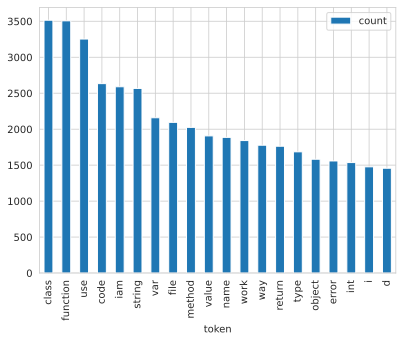

In [91]:
# convert list of tuples into data frame
freq_df = pd.DataFrame.from_records(counter.most_common(20),
                                    columns=['token', 'count'])

# create bar plot
freq_df.plot(kind='bar', x='token');

#### Using Word Clouds

In [92]:
%matplotlib inline
import matplotlib.pyplot as plt

In [93]:
from wordcloud import WordCloud

def wordcloud(counter):
    """A small wordloud wrapper"""
    wc = WordCloud(width=1200, height=800, 
                   background_color="white", 
                   max_words=200) 
    wc.generate_from_frequencies(counter)

    # Plot
    fig=plt.figure(figsize=(6, 4))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()

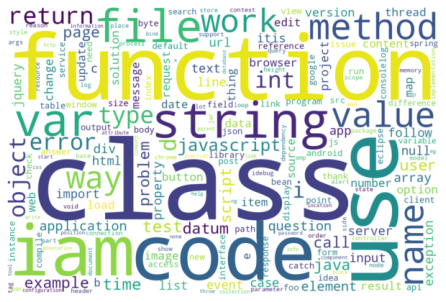

In [94]:
# create wordcloud
wordcloud(counter)

> Let's compare the word cloud of "python" tags with the word cloud for "C#"

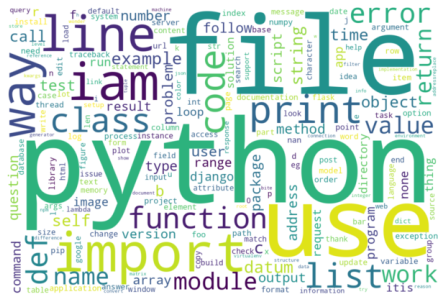

In [95]:
python_tokens = final_dataset[final_dataset.Tags.astype(str).str.contains(('python'))].Body_nouns.map(my_tokenizer).sum()
python_counter = Counter(python_tokens)
wordcloud(python_counter)

> Finally, a wordcloud of javascript

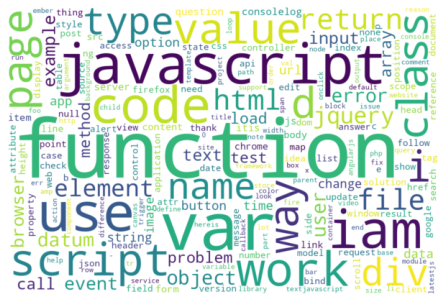

In [96]:
javascript_tokens = final_dataset[final_dataset.Tags.astype(str).str.contains(('javascript'))].Body_nouns.map(my_tokenizer).sum()
javascript_counter = Counter(javascript_tokens)
wordcloud(javascript_counter)

####Exploring Text Complexity

In [97]:
tags_features[:10]

['java',
 'c#',
 'javascript',
 'android',
 'python',
 'c++',
 '.net',
 'php',
 'jquery',
 'ios']

In [100]:
# size info, including memory consumption
final_dataset.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32604 entries, 0 to 1262668
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               32604 non-null  int64  
 1   Score            32604 non-null  int64  
 2   Title            32604 non-null  object 
 3   Body             32604 non-null  object 
 4   Tags             32604 non-null  object 
 5   Body_clean       32604 non-null  object 
 6   Title_clean      32604 non-null  object 
 7   Body_lemma       32603 non-null  object 
 8   Body_nouns       32603 non-null  object 
 9   Body_adjectives  32603 non-null  object 
 10  Body_verbs       32603 non-null  object 
 11  Body_nav         32603 non-null  object 
 12  no_tokens        32603 non-null  float64
dtypes: float64(1), int64(2), object(10)
memory usage: 130.8 MB


In [106]:
final_dataset = final_dataset[final_dataset['Body_lemma'].notnull()]
final_dataset['no_tokens'] = final_dataset.Body_lemma.map(lambda l:  len(l.split()) if l else 0)

In [131]:
def mean_tokens(tag):
  return final_dataset[final_dataset.Tags.astype(str).str.contains(tag)].agg({'no_tokens':'mean'}).sort_values(ascending=False)


In [145]:
token_df = pd.DataFrame({'Tag': pd.Series(dtype='str'), 'no_tokens': pd.Series(dtype='int')}, index=[0,1,2,3,4,5,6,7,8,9])

In [146]:
for idx, temp in enumerate(tags_features[:10]):
  if temp != 'c++':
    token_df.loc[idx] = [temp, mean_tokens(temp)]

<Axes: xlabel='Tag'>

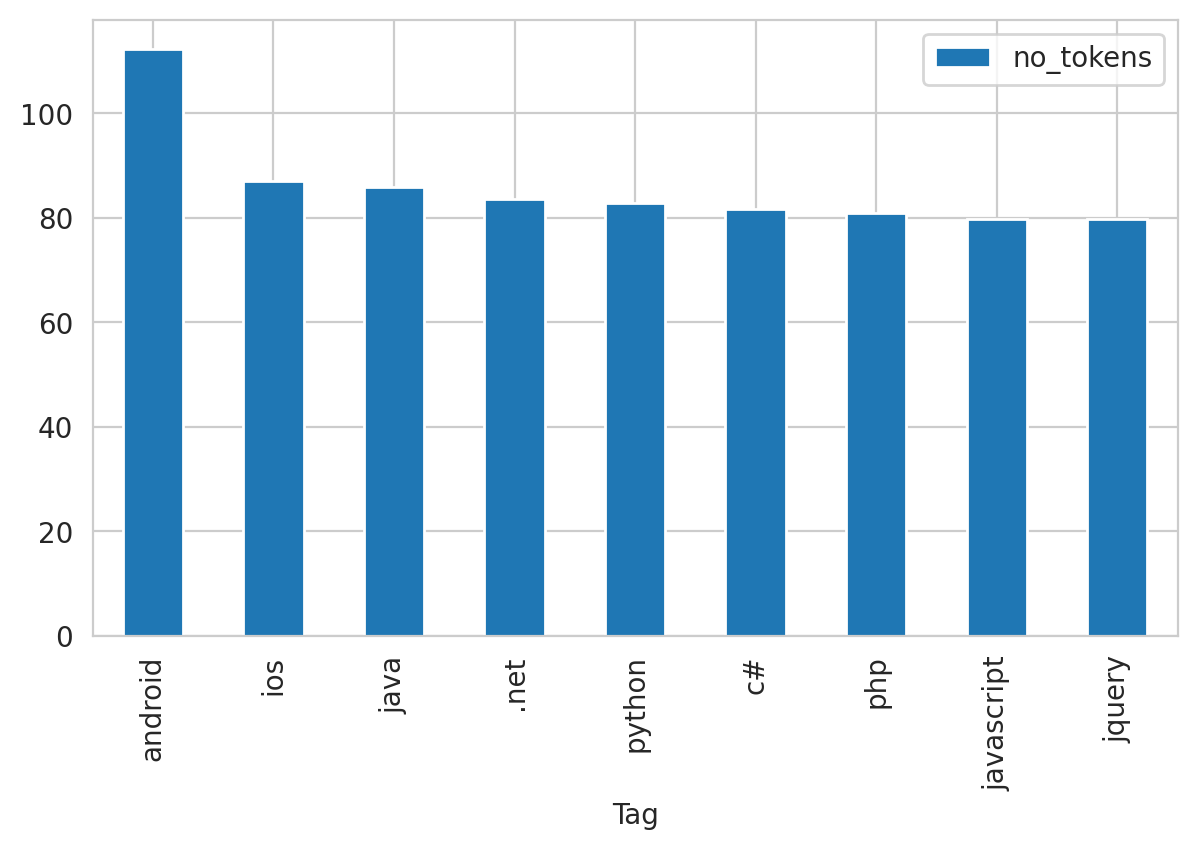

In [147]:
token_df.groupby(['Tag']).agg({'no_tokens':'mean'}).sort_values(by='no_tokens', ascending=False).plot(kind='bar', figsize=(7,4))

In [148]:
token_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Tag        9 non-null      object 
 1   no_tokens  9 non-null      float64
dtypes: float64(1), object(1)
memory usage: 540.0+ bytes


In [149]:
# render plots as retina or png, because svg is very slow
%config InlineBackend.figure_format = 'retina'

import seaborn as sns

def multi_boxplot(data, x, y, ylim = None):
    '''Wrapper for sns boxplot with cut-off functionality'''
    # plt.figure(figsize=(30, 5))
    fig, ax = plt.subplots()
    plt.xticks(rotation=90) 

    # order boxplots by median
    ordered_values = data.groupby(x)[[y]].median().sort_values(y, ascending=False).index
        
    sns.boxplot(x=x, y=y, data=data, palette='Set2', 
                order=ordered_values)

    fig.set_size_inches(11, 6)
    
    # cut-off y-axis at value ylim
    ax.set_ylim(0, ylim)

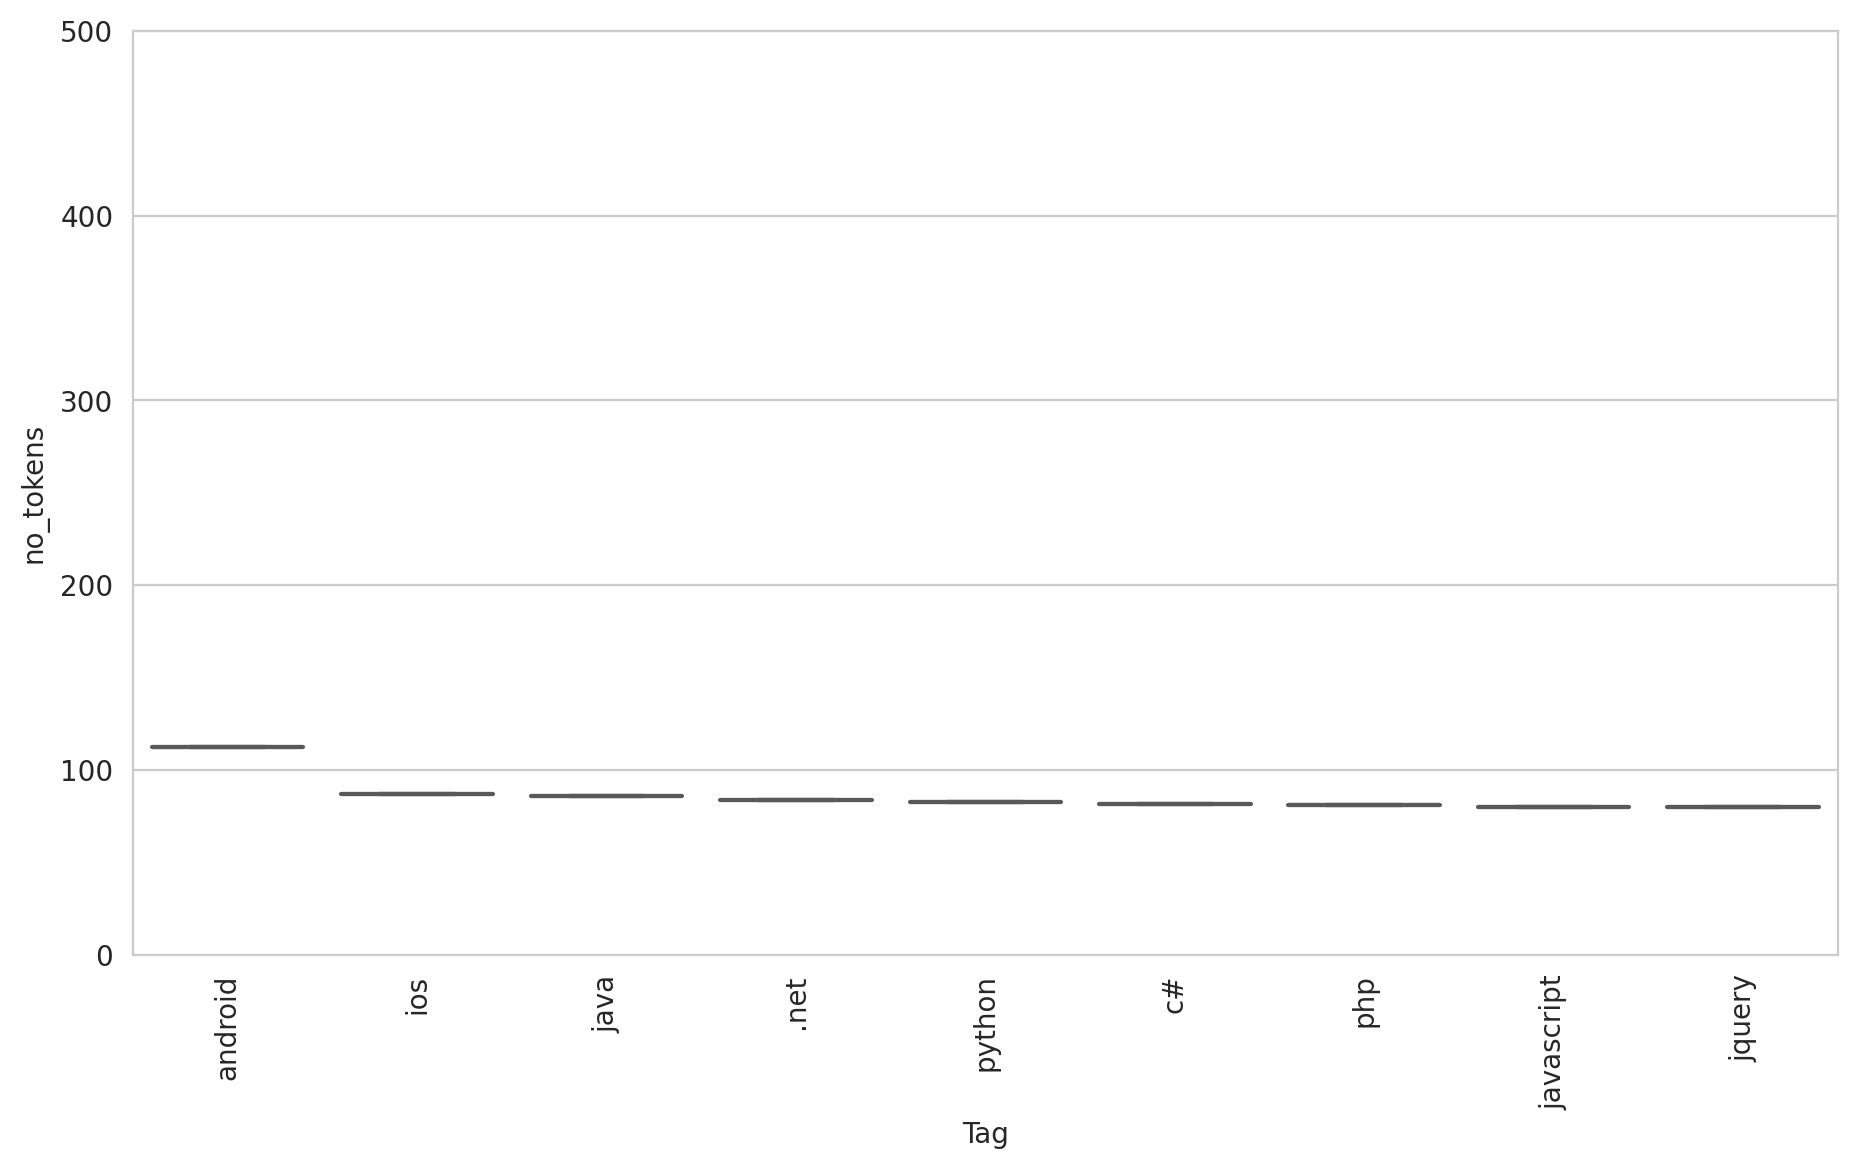

In [151]:
multi_boxplot(token_df, 'Tag', 'no_tokens', 500)